In [62]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [63]:
df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")


apple_path = 'datasets/apple.csv'
microsoft_path = 'datasets/microsoft.csv'
amazon_path = 'datasets/amazon.csv'

df_apple_to_csv.to_csv(apple_path)
df_microsoft_to_csv.to_csv(microsoft_path)
df_amazon_to_csv.to_csv(amazon_path)

df_apple = pd.read_csv(apple_path)
df_microsoft = pd.read_csv(microsoft_path)
df_amazon = pd.read_csv(amazon_path)

C:\Users\acer\AppData\Local\Temp\ipykernel_21156\1102566560.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed


C:\Users\acer\AppData\Local\Temp\ipykernel_21156\1102566560.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_21156\1102566560.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed


In [64]:
df_apple.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,72.53850555419922,72.59888386623527,71.29229630932706,71.54588227171874,135480400
3,2020-01-03,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800
4,2020-01-06,72.40567779541016,72.44432080433776,70.7030121336898,70.95418800651902,118387200


In [65]:
df_microsoft.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,153.04225158691406,153.14706257929302,150.8602957950901,151.28906274976458,22622100
3,2020-01-03,151.1366729736328,152.4039284141965,150.6030947963249,150.8508379064428,21116200
4,2020-01-06,151.52732849121094,151.59403303057528,149.1262122356397,149.66932792275708,20813700


In [66]:
df_amazon.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,94.90049743652344,94.90049743652344,93.2074966430664,93.75,80580000
3,2020-01-03,93.74849700927734,94.30999755859375,93.2249984741211,93.2249984741211,75288000
4,2020-01-06,95.14399719238281,95.18450164794922,93.0,93.0,81236000


In [67]:
df_apple['Date'] = df_apple['Price']
df_apple = df_apple.drop(index=[0,1], columns='Price')

df_microsoft['Date'] = df_microsoft['Price']
df_microsoft = df_microsoft.drop(index=[0,1], columns='Price')

df_amazon['Date'] = df_amazon['Price']
df_amazon = df_amazon.drop(index=[0,1], columns='Price')

In [68]:
df_apple.head()

,Close,High,Low,Open,Volume,Date
2,72.53850555419922,72.59888386623527,71.29229630932706,71.54588227171874,135480400,2020-01-02
3,71.83329010009766,72.59405542623057,71.60868452797844,71.76566667933918,146322800,2020-01-03
4,72.40567779541016,72.44432080433776,70.7030121336898,70.95418800651902,118387200,2020-01-06
5,72.06517028808594,72.67136376993946,71.84539226049357,72.41536021481039,108872000,2020-01-07
6,73.22442626953125,73.52631792855652,71.76810120120939,71.76810120120939,132079200,2020-01-08


In [69]:
df_microsoft.head()

,Close,High,Low,Open,Volume,Date
2,153.04225158691406,153.14706257929302,150.8602957950901,151.28906274976458,22622100,2020-01-02
3,151.1366729736328,152.4039284141965,150.6030947963249,150.8508379064428,21116200,2020-01-03
4,151.52732849121094,151.59403303057528,149.1262122356397,149.66932792275708,20813700,2020-01-06
5,150.145751953125,152.13714723225632,149.89802336904734,151.8036681235651,21634100,2020-01-07
6,152.53732299804688,153.21383324803998,150.498283797712,151.43204560824276,27746500,2020-01-08


In [70]:
df_amazon.head()

,Close,High,Low,Open,Volume,Date
2,94.90049743652344,94.90049743652344,93.2074966430664,93.75,80580000,2020-01-02
3,93.74849700927734,94.30999755859375,93.2249984741211,93.2249984741211,75288000,2020-01-03
4,95.14399719238281,95.18450164794922,93.0,93.0,81236000,2020-01-06
5,95.34300231933594,95.69450378417969,94.60199737548828,95.2249984741211,80898000,2020-01-07
6,94.59850311279297,95.55000305175781,94.3219985961914,94.9020004272461,70160000,2020-01-08


In [71]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 2 to 1411
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1410 non-null   object
 1   High    1410 non-null   object
 2   Low     1410 non-null   object
 3   Open    1410 non-null   object
 4   Volume  1410 non-null   object
 5   Date    1410 non-null   object
dtypes: object(6)
memory usage: 66.2+ KB


In [72]:
df_apple.describe()

,Close,High,Low,Open,Volume,Date
count,1410,1410,1410,1410,1410,1410
unique,1394,1410,1410,1410,1408,1410
top,139.2651824951172,230.8000030517578,227.07000732421875,228.00999450683594,90956700,2025-08-12
freq,2,1,1,1,2,1


In [73]:
df_apple.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
dtype: int64

In [74]:
df_apple['Close'] = df_apple['Close'].astype(float)
df_apple['High'] = df_apple['High'].astype(float)
df_apple['Low'] = df_apple['Low'].astype(float)
df_apple['Open'] = df_apple['Open'].astype(float)
df_apple['Volume'] = df_apple['Volume'].astype(float)
df_apple['Date'] = pd.to_datetime(df_apple['Date'])

In [75]:
df_apple.describe()

,Close,High,Low,Open,Volume,Date
count,1410.000000,1410.000000,1410.000000,1410.000000,1.410000e+03,1410
mean,158.653070,160.302882,156.833869,158.492042,8.705896e+07,2022-10-20 08:51:03.829787136
min,54.316940,55.316759,51.470005,55.215083,2.323470e+07,2020-01-02 00:00:00
25%,129.986855,131.399710,128.380754,129.910650,5.286620e+07,2021-05-26 06:00:00
50%,158.771332,160.542152,156.498326,158.399760,7.325130e+07,2022-10-18 12:00:00
75%,188.764473,189.984079,187.366191,188.488593,1.033882e+08,2024-03-14 18:00:00
max,258.103729,259.179926,256.718662,257.276679,4.265100e+08,2025-08-12 00:00:00
std,44.575531,44.838236,44.244234,44.524546,5.190117e+07,NaN


In [76]:
df_apple[df_apple['Close'] < 0].head()

,Close,High,Low,Open,Volume,Date


In [77]:
#AAPL FEATURE ENGINEERING

#CALCULATING RSI VALUE FOR TO CHECK MOMENTUM
window = 14

df_apple['Price Change'] = df_apple['Close'].diff().fillna(0)

df_apple['Gain'] = df_apple.loc[df_apple['Price Change'] > 0, 'Price Change']
df_apple['Loss'] = -df_apple.loc[df_apple['Price Change'] < 0, 'Price Change']

df_apple['Gain'] = df_apple['Gain'].fillna(0)
df_apple['Loss'] = df_apple['Loss'].fillna(0)

df_apple['Average Gain'] = df_apple['Gain'].rolling(window=window).mean().fillna(0)
df_apple['Average Loss'] = df_apple['Loss'].rolling(window=window).mean().fillna(0)

#df_apple = df_apple.drop(index=list(range(2,15)))

df_apple['RS'] = df_apple['Average Gain'] / df_apple['Average Loss']

df_apple['RSI'] = 100 - (100 / (1 + df_apple['RS']))

# df_apple['Target Close'] = df_apple['Close'].shift(-1) 

df_apple.head()
# df_apple['Average Gain']
# df_apple['Average Loss']
# df_apple['RS']
# df_apple['RSI']

,Close,High,Low,Open,Volume,Date,Price Change,Gain,Loss,Average Gain,Average Loss,RS,RSI
2,72.538506,72.598884,71.292296,71.545882,135480400.0,2020-01-02,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN
3,71.833290,72.594055,71.608685,71.765667,146322800.0,2020-01-03,-0.705215,0.000000,0.705215,0.0,0.0,NaN,NaN
4,72.405678,72.444321,70.703012,70.954188,118387200.0,2020-01-06,0.572388,0.572388,0.000000,0.0,0.0,NaN,NaN
5,72.065170,72.671364,71.845392,72.415360,108872000.0,2020-01-07,-0.340508,0.000000,0.340508,0.0,0.0,NaN,NaN
6,73.224426,73.526318,71.768101,71.768101,132079200.0,2020-01-08,1.159256,1.159256,0.000000,0.0,0.0,NaN,NaN


In [78]:
df_apple = df_apple.drop(columns=['Gain', 'Loss'])

In [79]:
#FEATURE ENGINEERING

#CALCULATING MACD VALUE FOR VOLATILITY
short_period = 12
long_period = 26
signal_line_period = 9

# df_apple['Short EMA'] = (df_apple['Close'] * (2 / (short_period + 1))) + ( (1 - (2 / (short_period + 1))) * df_apple['Close'].shift(1))
# df_apple['Long EMA'] = (df_apple['Close'] * (2 / (long_period + 1))) + ( (1 - (2 / (long_period + 1))) * df_apple['Close'].shift(1))

df_apple['Short EMA'] = df_apple['Close'].ewm(span=short_period,adjust=False).mean()
df_apple['Long EMA'] = df_apple['Close'].ewm(span=long_period, adjust=False).mean()

df_apple['MACD'] = df_apple['Short EMA'] - df_apple['Long EMA']

# df_apple['Signal Line'] = (df_apple['MACD'] * (2 / (signal_line_period + 1))) + ( (1 - (2 / (signal_line_period + 1))) * df_apple['MACD'].shift(1))
df_apple['Signal Line'] = df_apple['MACD'].ewm(span=signal_line_period, adjust=False).mean()

df_apple['MACD Histogram'] = df_apple['MACD'] - df_apple['Signal Line']


In [80]:
df_apple.head(n=27)     

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram
2,72.538506,72.598884,71.292296,71.545882,135480400.0,2020-01-02,0.000000,0.000000,0.000000,NaN,NaN,72.538506,72.538506,0.000000,0.000000,0.000000
3,71.833290,72.594055,71.608685,71.765667,146322800.0,2020-01-03,-0.705215,0.000000,0.000000,NaN,NaN,72.430011,72.486267,-0.056257,-0.011251,-0.045005
4,72.405678,72.444321,70.703012,70.954188,118387200.0,2020-01-06,0.572388,0.000000,0.000000,NaN,NaN,72.426267,72.480298,-0.054030,-0.019807,-0.034223
5,72.065170,72.671364,71.845392,72.415360,108872000.0,2020-01-07,-0.340508,0.000000,0.000000,NaN,NaN,72.370714,72.449548,-0.078834,-0.031612,-0.047221
6,73.224426,73.526318,71.768101,71.768101,132079200.0,2020-01-08,1.159256,0.000000,0.000000,NaN,NaN,72.502054,72.506946,-0.004892,-0.026268,0.021377
7,74.779755,74.972962,73.951366,74.202534,170108400.0,2020-01-09,1.555328,0.000000,0.000000,NaN,NaN,72.852470,72.675302,0.177168,0.014419,0.162749
8,74.948799,75.513947,74.446455,75.014012,140644800.0,2020-01-10,0.169044,0.000000,0.000000,NaN,NaN,73.174982,72.843709,0.331273,0.077790,0.253483
9,76.550049,76.576619,75.146857,75.265204,121532000.0,2020-01-13,1.601250,0.000000,0.000000,NaN,NaN,73.694223,73.118253,0.575970,0.177426,0.398544
10,75.516373,76.697376,75.393206,76.487261,161954400.0,2020-01-14,-1.033676,0.000000,0.000000,NaN,NaN,73.974554,73.295892,0.678662,0.277673,0.400989
11,75.192734,76.197430,74.760423,75.315908,121923600.0,2020-01-15,-0.323639,0.000000,0.000000,NaN,NaN,74.161966,73.436398,0.725568,0.367252,0.358316


In [81]:
print(df_apple.shape)
df_apple.info()

(1410, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 2 to 1411
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Close           1410 non-null   float64       
 1   High            1410 non-null   float64       
 2   Low             1410 non-null   float64       
 3   Open            1410 non-null   float64       
 4   Volume          1410 non-null   float64       
 5   Date            1410 non-null   datetime64[ns]
 6   Price Change    1410 non-null   float64       
 7   Average Gain    1410 non-null   float64       
 8   Average Loss    1410 non-null   float64       
 9   RS              1397 non-null   float64       
 10  RSI             1397 non-null   float64       
 11  Short EMA       1410 non-null   float64       
 12  Long EMA        1410 non-null   float64       
 13  MACD            1410 non-null   float64       
 14  Signal Line     1410 non-null   float64      

In [82]:
df_apple = df_apple.dropna()

In [83]:
df_apple.head()

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram
15,76.728767,77.281827,76.634574,76.941293,101832400.0,2020-01-22,0.272896,0.508210,0.208906,2.432724,70.868613,75.349469,74.270922,1.078547,0.738872,0.339675
16,77.098289,77.177986,76.233668,76.781908,104472000.0,2020-01-23,0.369522,0.534605,0.208906,2.559070,71.902770,75.618518,74.480357,1.138161,0.818729,0.319432
17,76.876091,78.088485,76.685293,77.344627,146537600.0,2020-01-24,-0.222198,0.534605,0.174405,3.065312,75.401641,75.811991,74.657819,1.154172,0.885818,0.268354
18,74.615524,75.296586,73.632564,74.883600,161940000.0,2020-01-27,-2.260567,0.493720,0.335874,1.469957,59.513463,75.627919,74.654686,0.973233,0.903301,0.069932
19,76.726349,76.897821,75.398026,75.497047,162234000.0,2020-01-28,2.110825,0.644493,0.311552,2.068655,67.412432,75.796908,74.808142,0.988766,0.920394,0.068372


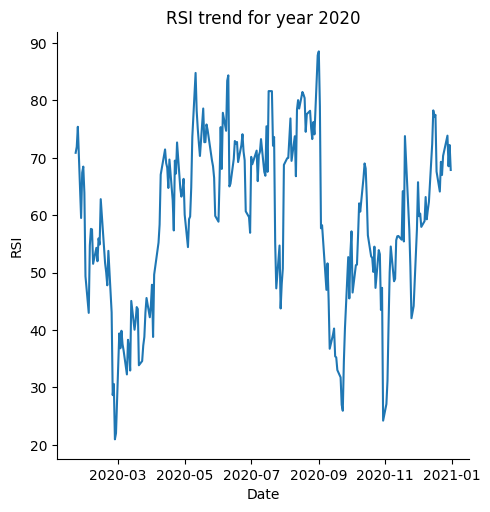

<Figure size 2000x1000 with 0 Axes>

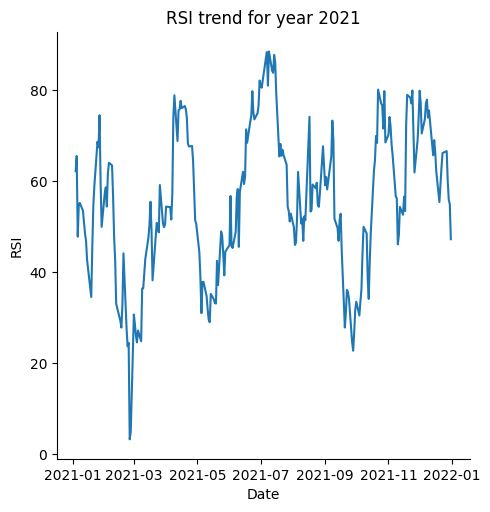

<Figure size 2000x1000 with 0 Axes>

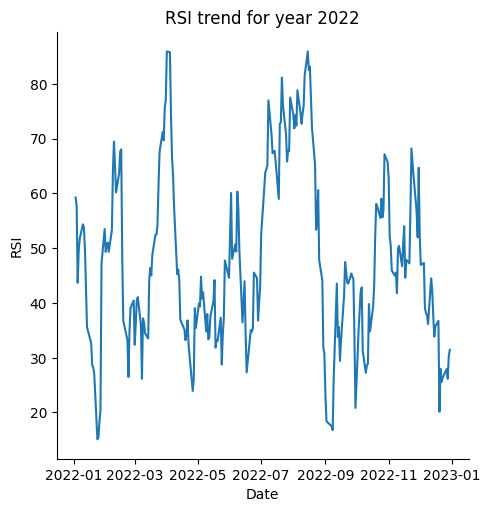

<Figure size 2000x1000 with 0 Axes>

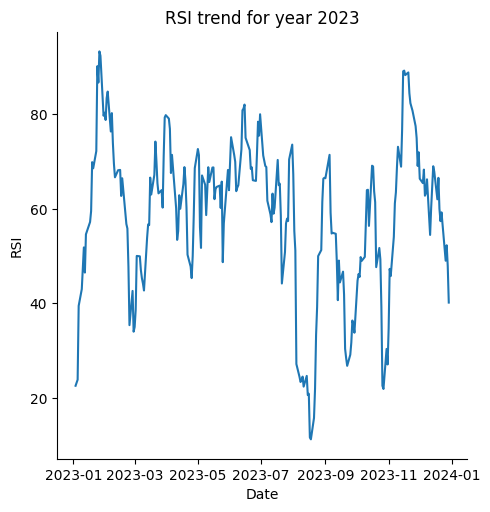

<Figure size 2000x1000 with 0 Axes>

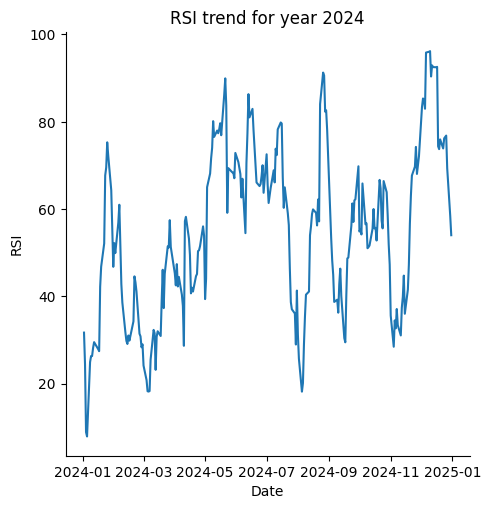

<Figure size 2000x1000 with 0 Axes>

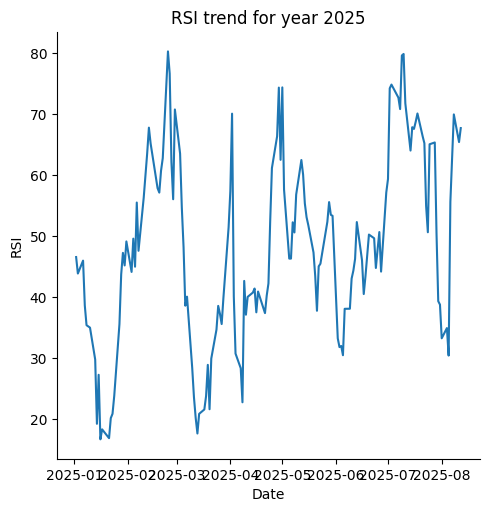

<Figure size 2000x1000 with 0 Axes>

In [84]:
# sns.relplot(data=df_apple.loc[(df_apple['Date'].dt.year >= 2023) & (df_apple['Date'].dt.year < 2025), :], x='Date', y='RSI', kind='line')
# plt.show()

df_apple['Year'] = df_apple['Date'].dt.year

years = list(range(2020,2026))

for year in years:
    sns.relplot(data=df_apple.loc[df_apple['Year'] == year], x='Date', y='RSI', kind='line')
    plt.title(f'RSI trend for year {year}')
    plt.figure(figsize=(20,10))
    plt.show()

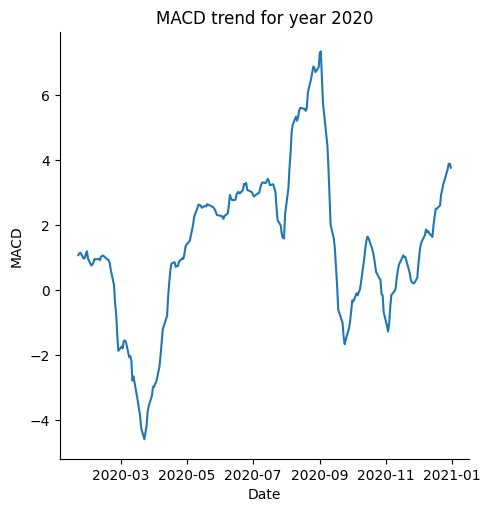

<Figure size 2000x1000 with 0 Axes>

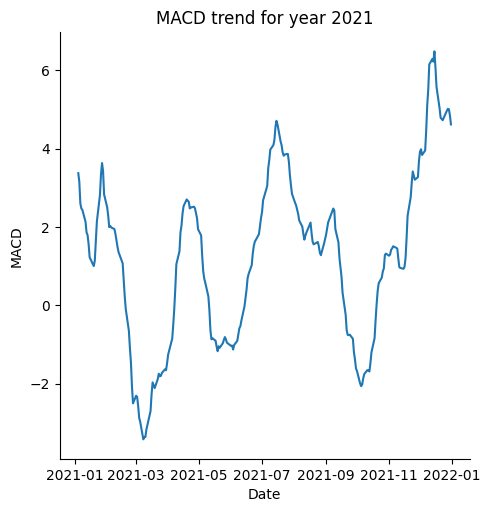

<Figure size 2000x1000 with 0 Axes>

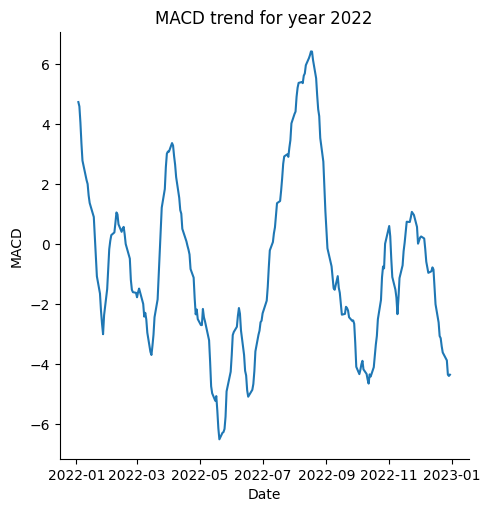

<Figure size 2000x1000 with 0 Axes>

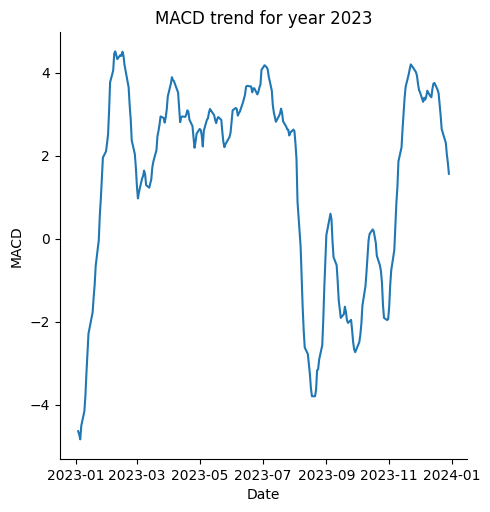

<Figure size 2000x1000 with 0 Axes>

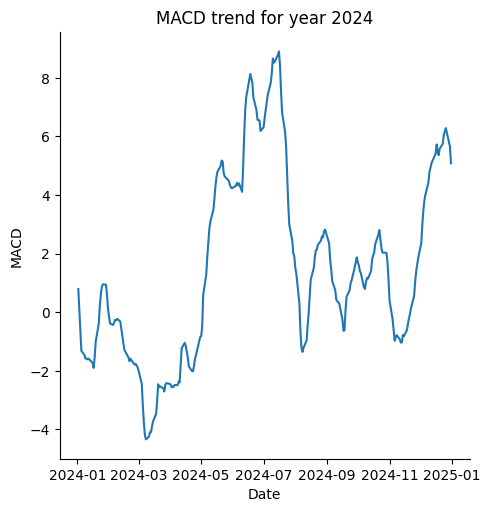

<Figure size 2000x1000 with 0 Axes>

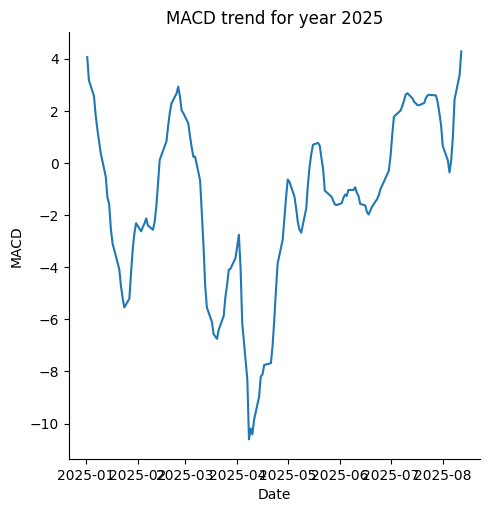

<Figure size 2000x1000 with 0 Axes>

In [85]:
#MACD	Signal Line	MACD Histogram
for year in years:
    sns.relplot(data=df_apple.loc[df_apple['Year'] == year], x='Date', y='MACD', kind='line')
    plt.title(f'MACD trend for year {year}')
    plt.figure(figsize=(20,10))
    plt.show()

In [86]:
df_apple.head()

,Close,High,Low,Open,Volume,Date,Price Change,Average Gain,Average Loss,RS,RSI,Short EMA,Long EMA,MACD,Signal Line,MACD Histogram,Year
15,76.728767,77.281827,76.634574,76.941293,101832400.0,2020-01-22,0.272896,0.508210,0.208906,2.432724,70.868613,75.349469,74.270922,1.078547,0.738872,0.339675,2020
16,77.098289,77.177986,76.233668,76.781908,104472000.0,2020-01-23,0.369522,0.534605,0.208906,2.559070,71.902770,75.618518,74.480357,1.138161,0.818729,0.319432,2020
17,76.876091,78.088485,76.685293,77.344627,146537600.0,2020-01-24,-0.222198,0.534605,0.174405,3.065312,75.401641,75.811991,74.657819,1.154172,0.885818,0.268354,2020
18,74.615524,75.296586,73.632564,74.883600,161940000.0,2020-01-27,-2.260567,0.493720,0.335874,1.469957,59.513463,75.627919,74.654686,0.973233,0.903301,0.069932,2020
19,76.726349,76.897821,75.398026,75.497047,162234000.0,2020-01-28,2.110825,0.644493,0.311552,2.068655,67.412432,75.796908,74.808142,0.988766,0.920394,0.068372,2020


In [87]:
X = df_apple.drop(columns=['Date', 'Close'])
y = df_apple['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
    ])

In [90]:
kfold = KFold(n_splits=6, random_state=30, shuffle=True)

cv = GridSearchCV(estimator=model,param_grid={
    'lr__n_jobs': [10,20,50],
    'scaler__with_mean':[True, False]
    },cv=kfold)

cv.fit(X_train, y_train)

print("Best parameter:", cv.best_params_)
print("Best score:", cv.best_score_)


Best parameter: {'lr__n_jobs': 10, 'scaler__with_mean': True}
Best score: 0.9996759726295075


In [94]:
y_pred = cv.predict(X_test)

print("Predicted values respectively:",y_pred[0:10])

print("Correct values:")
print(y_test[0:10])

Predicted values respectively: [133.859255   226.10599395 229.25876693 190.12900531 173.25179416
 151.8438029  141.87649322 213.65598641 206.69585041 192.09898207]
Correct values:
378     133.879715
1280    227.203445
1234    229.056854
994     191.558197
493     172.296005
687     151.331146
708     141.161697
1407    213.008255
1354    206.625504
1003    191.974686
Name: Close, dtype: float64
